# Libraries :

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install speechrecognition googletrans==4.0.0-rc1 pydub vosk

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install gtts

Note: you may need to restart the kernel to use updated packages.


In [21]:
import string 
import os
from PIL import Image
import numpy as np 
import tensorflow as tf
from tensorflow.keras.applications.vgg16  import  VGG16
from tensorflow.keras.applications.resnet import  ResNet50
from tensorflow.keras.applications.xception import  Xception 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import add
import matplotlib.pyplot as plt
import pickle
from googletrans import Translator
from gtts import gTTS
from transformers import TFBertModel, BertTokenizer, T5Tokenizer, TFT5ForConditionalGeneration , TFAutoModelForSeq2SeqLM, AutoTokenizer

'import string \nimport os\nfrom PIL import Image\nimport numpy as np \nimport tensorflow as tf\nfrom tensorflow.keras.applications.vgg16  import  VGG16\nfrom tensorflow.keras.applications.resnet import  ResNet50\nfrom tensorflow.keras.applications.xception import  Xception \nfrom tensorflow.keras.preprocessing.text import Tokenizer\nfrom tensorflow.keras.preprocessing.sequence import pad_sequences\nfrom tensorflow.keras.utils import to_categorical\nfrom tensorflow.keras.models import Model ,load_model\nfrom tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout\nfrom tensorflow.keras.layers import add\nimport matplotlib.pyplot as plt\nimport pickle\nfrom googletrans import Translator\nfrom gtts import gTTS\nfrom transformers import TFBertModel, BertTokenizer, T5Tokenizer, TFT5ForConditionalGeneration , TFAutoModelForSeq2SeqLM, AutoTokenizer'

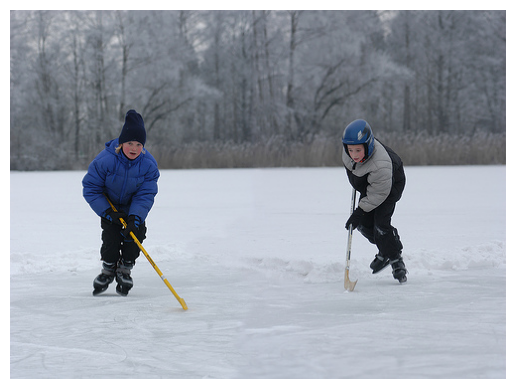

In [3]:
img_path = 'D:\\Image Caption Test\\10.jpg'
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
path='D:\\image_caption'

tokens='text\\caption.token.txt'

fileName =path +'\\'+ tokens
fileName 

'D:\\image_caption\\text\\caption.token.txt'

In [9]:
def readfile(path):
    file = open(path,'r')
    info = file.read()
    file.close()
    return info
descriptions = {}
def analysis(path):
    data = readfile(fileName)
    data = data.split('\n')
    
   
    
    for record in data :
        img ,caption = record.split('\t')
        if img[:-2] in descriptions:
            descriptions[img[:-2]].append(caption)
        else :
            descriptions[img[:-2]] = [caption]
    return descriptions
data = analysis(fileName)
data

{'1000268201_693b08cb0e.jpg': ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A girl going into a wooden building .',
  'A little girl climbing into a wooden playhouse .',
  'A little girl climbing the stairs to her playhouse .',
  'A little girl in a pink dress going into a wooden cabin .'],
 '1001773457_577c3a7d70.jpg': ['A black dog and a spotted dog are fighting',
  'A black dog and a tri-colored dog playing with each other on the road .',
  'A black dog and a white dog with brown spots are staring at each other in the street .',
  'Two dogs of different breeds looking at each other on the road .',
  'Two dogs on pavement moving toward each other .'],
 '1002674143_1b742ab4b8.jpg': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
  'T

In [6]:
data.keys()

dict_keys(['1000268201_693b08cb0e.jpg', '1001773457_577c3a7d70.jpg', '1002674143_1b742ab4b8.jpg', '1003163366_44323f5815.jpg', '1007129816_e794419615.jpg', '1007320043_627395c3d8.jpg', '1009434119_febe49276a.jpg', '1012212859_01547e3f17.jpg', '1015118661_980735411b.jpg', '1015584366_dfcec3c85a.jpg', '101654506_8eb26cfb60.jpg', '101669240_b2d3e7f17b.jpg', '1016887272_03199f49c4.jpg', '1019077836_6fc9b15408.jpg', '1019604187_d087bf9a5f.jpg', '1020651753_06077ec457.jpg', '1022454332_6af2c1449a.jpg', '1022454428_b6b660a67b.jpg', '1022975728_75515238d8.jpg', '102351840_323e3de834.jpg', '1024138940_f1fefbdce1.jpg', '102455176_5f8ead62d5.jpg', '1026685415_0431cbf574.jpg', '1028205764_7e8df9a2ea.jpg', '1030985833_b0902ea560.jpg', '103106960_e8a41d64f8.jpg', '103195344_5d2dc613a3.jpg', '103205630_682ca7285b.jpg', '1032122270_ea6f0beedb.jpg', '1032460886_4a598ed535.jpg', '1034276567_49bb87c51c.jpg', '104136873_5b5d41be75.jpg', '1042020065_fb3d3ba5ba.jpg', '1042590306_95dea0916c.jpg', '1045521051

In [10]:
caption = data['1022975728_75515238d8.jpg'][0]

def preprocessing(caption):
    
    punct = str.maketrans('', '', string.punctuation)
    caption = caption.replace('-',' ')
    caption_list=caption.split()
    caption_list = [word.lower() for word in caption_list if(len(word)>1)and (word.isalpha())]
    caption_list = [word.translate(punct) for word in caption_list]
    
    return ' '.join(caption_list)
def clean_text(data):
    for img,captions in data.items():
        for indx , caption in enumerate(captions) :
            data[img][indx]= preprocessing(caption)
    return data

cleaned_data = clean_text(data)
cleaned_data['1022975728_75515238d8.jpg']

['black dog running in the surf',
 'black lab with tags frolicks in the water',
 'dog splashes in the water',
 'the black dog runs through the water',
 'this is black dog splashing in the water']

In [8]:
repository_vocab = set()
def generate_repository(data):
    for img in data.keys() :
        [repository_vocab.update(caption.split()) for caption in cleaned_data[img]]
    return repository_vocab

rep_vocab=generate_repository(cleaned_data)

def write_file(path,data):
    lines=[]
    for img,captions in data.items():
        for caption in captions:
            lines.append(img + '\t' +caption)
    lines = '\n'.join(lines)
    file = open(path,'w')
    file.write(lines)
    file.close()

write_file('D:\\image_caption\\text\\cleaned_tokens.txt',cleaned_data)

In [ ]:
# Split data into training and validation sets
def split_data(data, split_ratio=0.8):
    images = list(data.keys())
    random.shuffle(images)  # Shuffle for randomness
    split_index = int(len(images) * split_ratio)
    train_images = images[:split_index]
    val_images = images[split_index:]
    return train_images, val_images

# Example usage
train_images, val_images = split_data(cleaned_data, split_ratio=0.8)

In [ ]:
# Save training and validation splits
def save_split(file_path, images):
    with open(file_path, 'w') as file:
        file.write('\n'.join(images))

save_split('D:\\image_caption\\text\\caption.trainImages.txt', train_images)
save_split('D:\\image_caption\\text\\caption.valImages.txt', val_images)

# experiments on images Dataset

## experiment1:  VGG16

In [ ]:
def feature_extraction_vgg16(path):
    model = VGG16(include_top=False, pooling='avg')
    features = {}
    
    for imageName in os.listdir(path):
        completePath = os.path.join(path, imageName)
        img = Image.open(completePath).resize((224, 224))
        img = np.expand_dims(np.array(img), axis=0)
        img = vgg_preprocess(img)  # VGG16 Preprocessing
        
        feature = model.predict(img)
        features[imageName] = feature
        print(feature)
    
    return features

## experiment2: ResNet50

In [ ]:
def feature_extraction_resnet50(path):
    model = ResNet50(include_top=False, pooling='avg')
    features = {}
    
    for imageName in os.listdir(path):
        completePath = os.path.join(path, imageName)
        img = Image.open(completePath).resize((224, 224))
        img = np.expand_dims(np.array(img), axis=0)
        img = resnet_preprocess(img)  # ResNet50 Preprocessing
        
        feature = model.predict(img)
        features[imageName] = feature
        print(feature)
    
    return features

# experiment3: Xception

In [ ]:
path_images='D:\\image_caption\\images\\images'
model = Xception(include_top = False , pooling = 'avg')


def feature_extraction(path,model):

    features={}
    for imageName in os.listdir(path):
        completePath = path_images + '\\' + imageName
        img = Image.open(completePath)
        img = img.resize((299,299))
        img = np.expand_dims(img, axis=0)
        img = img / 127.5
        img = img -1.0
        
        feature = model.predict(img)
        
        features[imageName] = feature
        print(feature)
    return features

In [ ]:
features = feature_extraction(path_images,model)

pickle.dump(features, open('D:\\image_caption\\images_features.bin','wb'))

1/1 [==============================] - 1s 834ms/step
[[0.47339672 0.01732633 0.07333981 ... 0.08559042 0.02102297 0.23766531]]
1/1 [==============================] - 0s 75ms/step
[[0.00158211 0.11113483 0.00037396 ... 0.26503572 0.35279843 0.05871663]]
1/1 [==============================] - 0s 71ms/step
[[0.         0.02488967 0.01554057 ... 0.         0.         0.1019264 ]]
1/1 [==============================] - 0s 74ms/step
[[0.         0.12443951 0.7391624  ... 0.00390435 0.00997145 0.5017234 ]]
1/1 [==============================] - 0s 89ms/step
[[0.04136677 0.         0.01274472 ... 0.00944689 0.6420169  0.0479212 ]]
1/1 [==============================] - 0s 83ms/step
[[0.         0.         0.02624732 ... 0.3052861  0.23091775 0.14191073]]
1/1 [==============================] - 0s 85ms/step
[[0.20927523 0.         0.09285209 ... 0.10374414 0.0425936  0.        ]]
1/1 [==============================] - 0s 85ms/step
[[0.         0.12888514 0.11070187 ... 0.0012872  0.         0.07

In [9]:
features = pickle.load(open('D:\\image_caption\\images_features.bin','rb'))

In [11]:
train_images_path = 'D:\\image_caption\\text\\caption.trainImages.txt'
clean_tokens_path = 'D:\\image_caption\\text\\cleaned_tokens.txt'
features_path = 'D:\\image_caption\\images_features.bin'

def load_images(path):
   data = readfile(path)
   data = data.split('\n')

   return data 

def load_tokens(path,images) :
    data = readfile(path)
    lines = data.split('\n')
    tokens={}
    for line in lines:
        image, caption =line.split('\t')
        if image in images:
            if image not in tokens:
                tokens[image]=[]
            tokens[image].append('<start> '+ caption + ' <end>')

    return tokens

def load_features(path,images):
    features = pickle.load(open(path,'rb'))

    selected_features = [{image:features[image]} for image in images if image in features]
    
    return selected_features


train_image = load_images(train_images_path)
train_tokens = load_tokens(clean_tokens_path,train_image)
train_features = load_features(features_path,train_image)

# Expirements on captions Dataset 

## experiment1: Tokenizer & Embedding

In [12]:
#fetch captions on specific pictures
def fetch_captions(data):
    captions = []
    
    for caps in train_tokens.values():
        for cap in caps:
            captions.append(cap)
    
    return captions
def create_tokenizer(captions):
    tokenizer =Tokenizer()
    tokenizer.fit_on_texts(captions)
    return tokenizer

def longest_captions(captions):
    return max( len(cap.split()) for cap in captions )

In [16]:
tokenizer.texts_to_sequences([train_tokens['1022975728_75515238d8.jpg'][0]])[0]

[2, 14, 8, 31, 3, 4, 474, 1]

In [15]:
captions = fetch_captions(train_tokens)

tokenizer =  create_tokenizer(captions)

vocab_size = len(tokenizer.word_index) + 1

#tokenizer.texts_to_sequences([train_tokens['1007320043_627395c3d8.jpg'][0]])[0]
max_cap = longest_captions(captions)

## experiment2: Bert Pretrained model

In [22]:
def create_embeddings(captions):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = TFBertModel.from_pretrained('bert-base-uncased')
    
    embeddings = {}
    for caption in captions:
        inputs = tokenizer(caption, return_tensors='tf', padding=True, truncation=True)
        outputs = model(inputs)
        caption_embedding = tf.reduce_mean(outputs.last_hidden_state, axis=1).numpy()
        embeddings[caption] = caption_embedding
    
    return embeddings

## experiment3: T5 Tokenizer Pretrained model

In [8]:
def fine_tune_t5(captions, epochs=3, batch_size=8):
    tokenizer = T5Tokenizer.from_pretrained('t5-small')
    model = TFT5ForConditionalGeneration.from_pretrained('t5-small')
    
    # تحويل التسميات إلى Tokenized Inputs
    inputs = tokenizer(captions, return_tensors='tf', padding=True, truncation=True, max_length=50)
    labels = tokenizer(captions, return_tensors='tf', padding=True, truncation=True, max_length=50).input_ids
    dataset = tf.data.Dataset.from_tensor_slices((inputs['input_ids'], labels))
    dataset = dataset.batch(batch_size)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    # تدريب النموذج
    model.fit(dataset, epochs=epochs)
    
    return model

In [13]:
model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = TFT5ForConditionalGeneration.from_pretrained(model_name)

# تحضير البيانات
captions = fetch_captions(train_tokens)
inputs = tokenizer(captions, padding=True, truncation=True, return_tensors="tf")

# إنشاء `decoder_input_ids` عن طريق `shift`
decoder_input_ids = inputs["input_ids"][:, :-1]  # إزالة التوكن الأخير
labels = inputs["input_ids"][:, 1:]  # إزاحة التوكنات نحو اليسار

# تحويل البيانات إلى tf.data.Dataset
dataset = tf.data.Dataset.from_tensor_slices((
    {"input_ids": inputs["input_ids"], "attention_mask": inputs["attention_mask"], "decoder_input_ids": decoder_input_ids},
    labels
)).batch(2)

# إعداد النموذج
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss)

# تدريب النموذج
model.fit(dataset, epochs=3)


All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


Epoch 1/3
14965/14965 [==============================] - 2805s 187ms/step - loss: 0.0597
Epoch 2/3
14965/14965 [==============================] - 2831s 189ms/step - loss: 4.5251e-04
Epoch 3/3
14965/14965 [==============================] - 2809s 188ms/step - loss: 2.0871e-04


# sequence

In [13]:
def build_sequence(tokenizer ,max_cap,vocab_size,feature,captions):
    # features , sequences , word 
    input_1 , input_2 , output =[],[], []

    for cap in captions:
        seq = tokenizer.texts_to_sequences([cap])[0]
        for indx in range(len(seq)):
            in_seq = seq[:indx]
            in_seq =pad_sequences([in_seq],maxlen = max_cap, padding ='post' )[0]
            output_w = seq[indx]
            output_w = to_categorical([output_w],num_classes = vocab_size)[0]

            input_1.append(feature)
            input_2.append(in_seq)#print (len(in_seq)) # 35 
            output.append(output_w)#print (len(output_w)) #7297
            
    return np.array(input_1), np.array(input_2), np.array(output)
                                      #train_tokens
def data_generator(tokenizer, features   , train_tokens ,   max_cap,vocab_size):
    while True:
        for img ,captions in train_tokens.items():
            if img in features:
                f= features[img][0]
                input_img , input_seq, output_word = build_sequence(tokenizer ,max_cap,vocab_size,f,captions)

                yield [[input_img , input_seq],output_word]

In [14]:
[[in_img , in_seq],out_w] = next(data_generator(tokenizer,features,train_tokens,max_cap,vocab_size))

In [15]:
in_img.shape ,in_seq.shape, out_w.shape



((52, 2048), (52, 35), (52, 7297))

In [16]:
featureSize = in_img.shape[1]

# Build Model

In [21]:
def build_model(num_features,longest_caption,output_size):
    #CNN Model --images--
    inputs_img = Input(shape=(num_features,))
    cnn_layer1 = Dropout(0.5)(inputs_img)
    cnn_layer2 = Dense(256,activation = 'relu')(cnn_layer1)

    #LSTM Model --text--
    inputs_seq = Input(shape=(longest_caption,))
    lstm_layer1 = Embedding(output_size,256,mask_zero = True)(inputs_seq)
    lstm_layer2 = Dropout(0.5)(lstm_layer1)
    lstm_layer3 = LSTM(256)(lstm_layer2)

    #Merging:

    merged_model = add([cnn_layer2,lstm_layer3])
    final_model = Dense(256, activation = 'relu')(merged_model)

    ouptput = Dense(output_size, activation = 'softmax')(final_model)

    model = Model(inputs=[inputs_img,inputs_seq],outputs=ouptput)
    model.compile(loss = 'categorical_crossentropy' ,optimizer ='adam')

    return model

In [22]:
model = build_model(featureSize,max_cap,vocab_size)

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 35)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 35, 256)      1868032     ['input_3[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 2048)         0           ['input_2[0][0]']                
                                                                                              

# Training Model

In [18]:
steps = len(train_tokens)
for i in range(16):
    generator = data_generator(tokenizer,features,train_tokens,max_cap,vocab_size)
    model.fit(generator , epochs =1 , steps_per_epoch = steps , verbose = 1)
    model.save("D:\\image_caption\\models\\model_"+ str(i)+".h5")

5986/5986 [==============================] - 391s 65ms/step - loss: 2.3689


# Testing:

In [5]:
def img_feature(path,cnn_model):
    try:
        img = Image.open(path)
        img = img.resize((299,299))
        img = np.expand_dims(img, axis=0)
        img = img / 127.5
        img = img -1.0
        
        imgFeature = cnn_model.predict(img)
        return imgFeature
    except:
        print("cannot read the image")
        return None

def get_word(indx,tokenizer):
    return tokenizer.index_word.get(indx,'')

def generate_captions(model,tokenizer,imgFeature,longest_cap):
    output_seq = 'start'
    for i in range(longest_cap):
        seq = tokenizer.texts_to_sequences([output_seq])[0]
        seq = pad_sequences([seq],maxlen=longest_cap)
        predict = model.predict([imgFeature,seq])
        indx = np.argmax(predict)
        word = get_word(indx,tokenizer)
        if word =='end':
            break
        output_seq+= ' '+word
    return output_seq[6:]

def translate_and_speak(text, dest_lang="ar"):
    # Translate text
    translator = Translator()
    translation = translator.translate(text, dest=dest_lang)
    translated_text = translation.text
    print(f"Translated Text: {translated_text}")

    # Convert translated text to speech
    tts = gTTS(translated_text, lang=dest_lang)
    audio_file = "translated_audio.mp3"
    tts.save(audio_file)

    # Play the audio file
    os.system(f"start {audio_file}")  # Windows
    # os.system(f"mpg321 {audio_file}")  # Linux/Mac (install mpg321 if needed)

def generate_cap(img_path):
    '''imgFeature = img_feature(img_path , cnn_model)
    caption = generate_captions(cap_model,tokenizer,imgFeature,max_cap)
    print(caption)'''
    imgFeature = img_feature(img_path, cnn_model)
    if imgFeature is not None:
        caption = generate_captions(cap_model, tokenizer, imgFeature, max_cap)
        print("Generated Caption (English):", caption)
         # Translate and speak the caption
        translate_and_speak(caption)
        
    else:
        print("Failed to generate caption.")



In [18]:
pickle.dump(tokenizer,open('D:\\test\\tokenizer','wb'))

In [3]:
cnn_model = Xception(include_top= False , pooling='avg')
cap_model = load_model('D:\\test\\model_15.h5')
tokenizer = pickle.load(open('D:\\test\\tokenizer','rb'))

# Generate Captions

In [ ]:
img_path = 'D:\\Image Caption Test\\10.jpg'
generate_cap(img_path)